<h1>Does Location Relative to the Equator Correlate Weather Pattners?</h1>

<h2>Dependencies and Range of Latitude and Longitude</h2>

In [15]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

<h2>Acquire Cities</h2>

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

<h2>Pull Weather Data By City</h2>

In [3]:
#Function to iterate through cities and return dictionaries of weather data per city
city_weathers = []

def get_weather(indices):
    
    #for loop to go through the list of cities
    for city in range(len(indices)):
        
        #querey url
        base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
        query_url = base_url + str(indices[city]) + '&units=imperial' +'&appid=' + api_key
        
        # Get one of the posts
        city_response = requests.get(query_url).json()
        
        #error handling
        try:
            print(f"Processing Record {city + 1} of Set 1")
        
            #assign variables 
            city_country = city_response['sys']['country']
            city_clouds = city_response['clouds']['all']
            city_date = city_response['dt']
            city_humidity = city_response['main']['humidity']
            city_lat = city_response['coord']['lat']
            city_lng = city_response['coord']['lon']
            city_temp = city_response['main']['temp_max']
            city_wind = city_response['wind']['speed']
        
            city_weather = {
                "city": indices[city],
                "country": city_country,
                "date": city_date,
                "cloudiness": city_clouds,
                "humidity": city_humidity,
                "latitude": city_lat,
                "longitude": city_lng,
                "max temperature": city_temp,
                "wind speed": city_wind
                }
        
        
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
            city_weather = {
                "city": np.nan,
                "country": np.nan,
                "date": np.nan,
                "cloudiness": np.nan,
                "humidity": np.nan,
                "latitude": np.nan,
                "longitude": np.nan,
                "max temperature": np.nan,
                "wind speed": np.nan
            }
        
        #append each dictionary to the list called 
        if city_weather not in city_weathers:
            city_weathers.append(city_weather)

        
get_weather(cities)
len(city_weathers)

Processing Record 1 of Set 1
Processing Record 2 of Set 1
Processing Record 3 of Set 1
Processing Record 4 of Set 1
Processing Record 5 of Set 1
Processing Record 6 of Set 1
Processing Record 7 of Set 1
Processing Record 8 of Set 1
Missing field/result... skipping.
Processing Record 9 of Set 1
Processing Record 10 of Set 1
Processing Record 11 of Set 1
Processing Record 12 of Set 1
Processing Record 13 of Set 1
Processing Record 14 of Set 1
Processing Record 15 of Set 1
Processing Record 16 of Set 1
Processing Record 17 of Set 1
Processing Record 18 of Set 1
Processing Record 19 of Set 1
Processing Record 20 of Set 1
Processing Record 21 of Set 1
Processing Record 22 of Set 1
Processing Record 23 of Set 1
Missing field/result... skipping.
Processing Record 24 of Set 1
Processing Record 25 of Set 1
Processing Record 26 of Set 1
Missing field/result... skipping.
Processing Record 27 of Set 1
Processing Record 28 of Set 1
Processing Record 29 of Set 1
Processing Record 30 of Set 1
Process

Processing Record 243 of Set 1
Processing Record 244 of Set 1
Processing Record 245 of Set 1
Processing Record 246 of Set 1
Processing Record 247 of Set 1
Processing Record 248 of Set 1
Processing Record 249 of Set 1
Processing Record 250 of Set 1
Processing Record 251 of Set 1
Processing Record 252 of Set 1
Processing Record 253 of Set 1
Processing Record 254 of Set 1
Processing Record 255 of Set 1
Processing Record 256 of Set 1
Processing Record 257 of Set 1
Processing Record 258 of Set 1
Processing Record 259 of Set 1
Processing Record 260 of Set 1
Processing Record 261 of Set 1
Processing Record 262 of Set 1
Processing Record 263 of Set 1
Processing Record 264 of Set 1
Processing Record 265 of Set 1
Processing Record 266 of Set 1
Processing Record 267 of Set 1
Processing Record 268 of Set 1
Processing Record 269 of Set 1
Processing Record 270 of Set 1
Missing field/result... skipping.
Processing Record 271 of Set 1
Processing Record 272 of Set 1
Processing Record 273 of Set 1
Proce

Processing Record 482 of Set 1
Missing field/result... skipping.
Processing Record 483 of Set 1
Missing field/result... skipping.
Processing Record 484 of Set 1
Processing Record 485 of Set 1
Processing Record 486 of Set 1
Missing field/result... skipping.
Processing Record 487 of Set 1
Processing Record 488 of Set 1
Processing Record 489 of Set 1
Processing Record 490 of Set 1
Processing Record 491 of Set 1
Processing Record 492 of Set 1
Processing Record 493 of Set 1
Processing Record 494 of Set 1
Processing Record 495 of Set 1
Processing Record 496 of Set 1
Missing field/result... skipping.
Processing Record 497 of Set 1
Processing Record 498 of Set 1
Processing Record 499 of Set 1
Processing Record 500 of Set 1
Processing Record 501 of Set 1
Missing field/result... skipping.
Processing Record 502 of Set 1
Processing Record 503 of Set 1
Processing Record 504 of Set 1
Processing Record 505 of Set 1
Processing Record 506 of Set 1
Missing field/result... skipping.
Processing Record 507

<h2>Send Output to CSV</h2>

In [4]:
#write city_weathers to a csv

keys = city_weathers[0].keys()

output_data_file = "cities.csv"

with open(output_data_file, 'w') as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for weather in city_weathers:
            writer.writerow(weather)

<h2>Display Dataframe</h2>

In [30]:
#display the dataframe

df = pd.DataFrame(city_weathers)
weather_df = df.dropna()
weather_df.count()

city               564
cloudiness         564
country            564
date               564
humidity           564
latitude           564
longitude          564
max temperature    564
wind speed         564
dtype: int64

In [31]:
weather_df.head()

,city,cloudiness,country,date,humidity,latitude,longitude,max temperature,wind speed
0,albany,90.0,US,1.551662e+09,59.0,42.65,-73.75,34.00,2.51
1,iqaluit,75.0,CA,1.551662e+09,69.0,63.75,-68.52,-9.41,5.82
2,nurota,56.0,UZ,1.551659e+09,87.0,40.56,65.69,42.80,9.17
3,coffs harbour,90.0,AU,1.551662e+09,69.0,-30.30,153.13,82.99,6.93
4,atuona,0.0,PF,1.551662e+09,100.0,-9.80,-139.03,81.49,12.12


<h2>Visualization</h2>

<h3>Latitude vs Temperature Plot</h3>

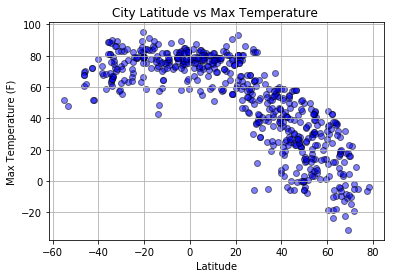

In [68]:
lat_temp_data = weather_df.groupby('city').mean()
y_axis_temp = lat_temp_data['max temperature']
x_axis_temp = lat_temp_data['latitude']
plt.scatter(x_axis, y_axis, color='blue', edgecolor='black', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("City Latitude vs Max Temperature ")
plt.savefig("citylattemp.png")
plt.show()

<h4>Max Temperatures Relative to City Latitude</h4>
<p>Judging by the random sampling of coordinates taken from citipy, the city selection has a broad range of city locations. Of the 564 cities that came back with weather data, 398 cities were located at or below the equator, and 166 cities were located at or above the equator. As we move below the equator, we can see that the high temperature for the day remained above 60 degrees Fahrenheit up to the -40 degrees south Latitude point. That is a significantly longer range of high temperatures than those above the equator, where temperatures begin to drop below 60 degrees Fahrenheit at about the 20 degrees north Latitude point. This has a lot to do with the fact that we're approaching fall south of the equator. Temperatures can be expected to be more mild this time of year. In the north-western and north-eastern hemispheres above the equator, we are experiencing a long, frigid winter. At roughly the equator, temperatures remain above 60 degrees Fahrenheit, surprisingly cool. Between -40 degrees south Latitude and 20 degrees north Latitude, only 5 cities logged a high temperature for the day over 90 degrees Fahrenheit. Given the persistent colloquialism that the closer to the equator one goes the hotter it gets, it seems that city data for early March is recording milder temperatures.</p>

<h3>Latitude vs Humidity Plot</h3>

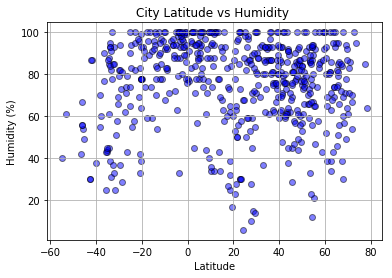

In [69]:
lat_humid_data = weather_df.groupby('city').mean()
x_axis_humid = lat_humid_data['latitude']
y_axis_humid = lat_humid_data['humidity']
plt.scatter(x_axis_humid, y_axis_humid, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity ")
plt.grid()
plt.savefig("citylathumid.png")
plt.show()

<h3>Latitude vs Cloudiness Plot</h3>

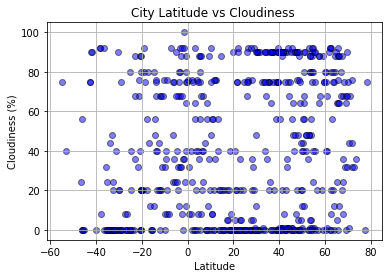

In [70]:
lat_clouds_data = weather_df.groupby('city').mean()
x_axis_clouds = lat_clouds_data['latitude']
y_axis_clouds = lat_clouds_data['cloudiness']
plt.scatter(x_axis_clouds, y_axis_clouds, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness ")
plt.grid()
plt.savefig("citylatclouds.png")
plt.show()

<h3>Latitude vs Wind Speed</h3>

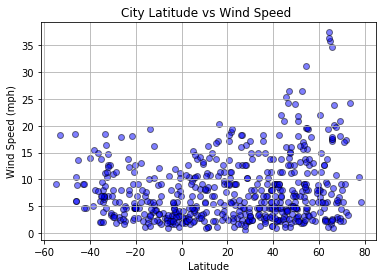

In [71]:
lat_wind_data = weather_df.groupby('city').mean()
x_axis_wind = lat_wind_data['latitude']
y_axis_wind = lat_wind_data['wind speed']
plt.scatter(x_axis_wind, y_axis_wind, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed ")
plt.grid()
plt.savefig("citylatwinds.png")
plt.show()

In [66]:
cities_above = lat_temp_data.loc[lat_temp_data['max temperature'] >= 90].count()
cities_below = lat_temp_data.loc[lat_temp_data['latitude'] <= 0].count()

cities_above

cloudiness         5
date               5
humidity           5
latitude           5
longitude          5
max temperature    5
wind speed         5
dtype: int64

In [63]:
cities_below

cloudiness         166
date               166
humidity           166
latitude           166
longitude          166
max temperature    166
wind speed         166
dtype: int64